## Visualizations of editing activity in en.wikipedia.org

By [Stuart Geiger](http://stuartgeiger.com), Berkeley Institute for Data Science

(C) 2016, Released under [The MIT license](https://opensource.org/licenses/MIT).

This data is collected and aggregated by Erik Zachte, which is [here](https://stats.wikimedia.org/EN/TablesWikipediaEN.htm) for the English Wikipedia. I have just copied that data from HTML tables into a CSV (which is not done here), then imported it into Pandas dataframes, and plotted it with matplotlib.



In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
%matplotlib inline
matplotlib.style.use('ggplot')


In [2]:
# Data by Erik Zachte at https://stats.wikimedia.org/EN/TablesWikipediaEN.htm
counts = pd.read_csv("edit_counts.tsv", sep="\t")


In [3]:
# Convert dates to datetimes
counts.date=pd.to_datetime(counts.date,infer_datetime_format=True)


In [4]:
# Peek at the dataset
counts

,date,user accounts,new accts,>5 edits,>100 edits,article count,articles > 200ch,new per day,mean edits,edits
0,2001-01-01,1,1,0,0,25,12,1,9.4,234
1,2001-02-01,6,5,6,0,153,129,5,5.8,661
2,2001-03-01,18,12,20,0,566,533,13,3.7,1.2 k
3,2001-04-01,29,11,21,1,1.1 k,787,18,2.7,872
4,2001-05-01,37,8,24,2,2.3 k,1.3 k,38,2.1,1.9 k
5,2001-06-01,45,8,25,1,2.7 k,1.6 k,13,2.2,966
6,2001-07-01,61,16,47,0,3.5 k,2.3 k,27,2.2,1.7 k
7,2001-08-01,84,23,58,2,5.0 k,3.6 k,49,2.1,2.9 k
8,2001-09-01,128,44,99,6,7.7 k,5.7 k,88,2.1,5.5 k
9,2001-10-01,176,48,122,14,12 k,9.2 k,133,2.1,9.0 k


Some of the columns use 'k' for thousands and 'M' for millions, so we need to convert them.

In [5]:

def units_convert(s):
    """
    Convert cells with k and M to times 1,000 and 1,000,000 respectively
    
    I got this solution from 
    http://stackoverflow.com/questions/14218728/converting-string-of-numbers-and-letters-to-int-float-in-pandas-dataframe
    """
    
    powers = {'k': 1000, 'M': 10 ** 6}

    if(s[-1] == 'k' or s[-1] == 'M'):
        try:
            power = s[-1]
            return float(s[:-1]) * powers[power]
        except TypeError:
            return float(s)
    else:
        return float(s)
    


In [6]:
# Apply this function to the columns that have 'k' or 'M' units, store them as new _float columns
counts['edits_float']=counts.edits.apply(units_convert)
counts['article_count_float']=counts['article count'].apply(units_convert)

In [7]:
# Make sure we've got data types figured out
counts.dtypes

date                   datetime64[ns]
user accounts                   int64
new accts                       int64
>5 edits                        int64
>100 edits                      int64
article count                  object
articles > 200ch               object
new per day                     int64
mean edits                    float64
edits                          object
edits_float                   float64
article_count_float           float64
dtype: object

In [8]:
counts.set_index(['date'])

,user accounts,new accts,>5 edits,>100 edits,article count,articles > 200ch,new per day,mean edits,edits,edits_float,article_count_float
date,,,,,,,,,,,
2001-01-01,1,1,0,0,25,12,1,9.4,234,234.0,25.0
2001-02-01,6,5,6,0,153,129,5,5.8,661,661.0,153.0
2001-03-01,18,12,20,0,566,533,13,3.7,1.2 k,1200.0,566.0
2001-04-01,29,11,21,1,1.1 k,787,18,2.7,872,872.0,1100.0
2001-05-01,37,8,24,2,2.3 k,1.3 k,38,2.1,1.9 k,1900.0,2300.0
2001-06-01,45,8,25,1,2.7 k,1.6 k,13,2.2,966,966.0,2700.0
2001-07-01,61,16,47,0,3.5 k,2.3 k,27,2.2,1.7 k,1700.0,3500.0
2001-08-01,84,23,58,2,5.0 k,3.6 k,49,2.1,2.9 k,2900.0,5000.0
2001-09-01,128,44,99,6,7.7 k,5.7 k,88,2.1,5.5 k,5500.0,7700.0


In [9]:
# Calculate some ratios

counts['highly_active_to_newcomer_ratio']=counts['>100 edits']/counts['new accts']
counts['highly_active_to_active_ratio']=counts['>100 edits']/(counts['>5 edits']-counts['>100 edits'])

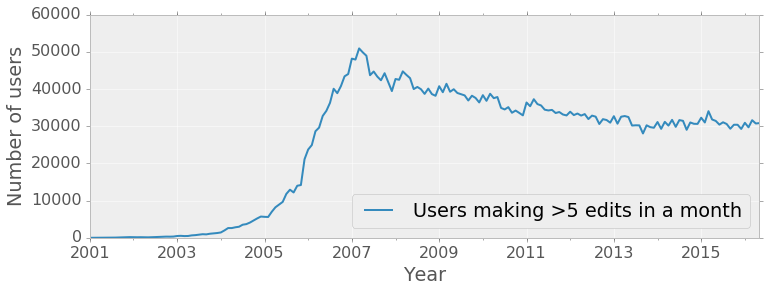

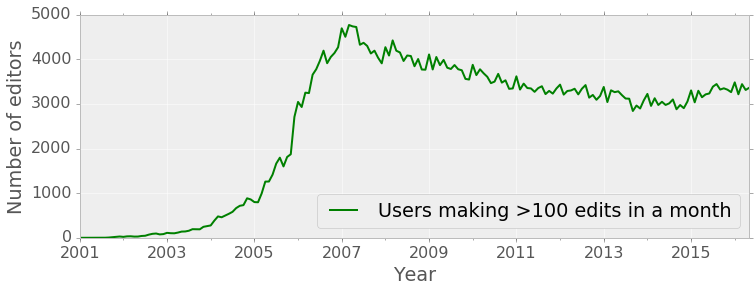

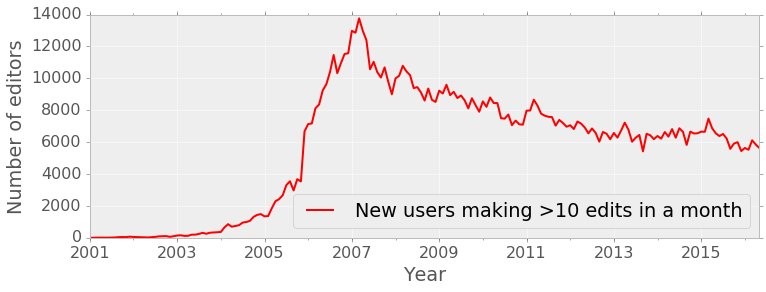

In [10]:
matplotlib.style.use(['bmh'])
font = {'weight' : 'regular',
        'size'   : 16}

matplotlib.rc('font', **font)

ax1 = counts.plot(x='date',y='>5 edits', figsize=(12,4), 
                  label="Users making >5 edits in a month")

ax1.set_xlabel("Year")
ax1.set_ylabel("Number of users")

ax2 = counts.plot(x='date',y='>100 edits', figsize=(12,4), 
                  label="Users making >100 edits in a month",color="g")
ax2.set_xlabel("Year")
ax2.set_ylabel("Number of editors")

ax3 = counts.plot(x='date',y='new accts', figsize=(12,4), 
                  label="New users making >10 edits in a month",color="r")
ax3.set_xlabel("Year")
ax3.set_ylabel("Number of editors")
ax3.yaxis.set_major_formatter(ScalarFormatter())

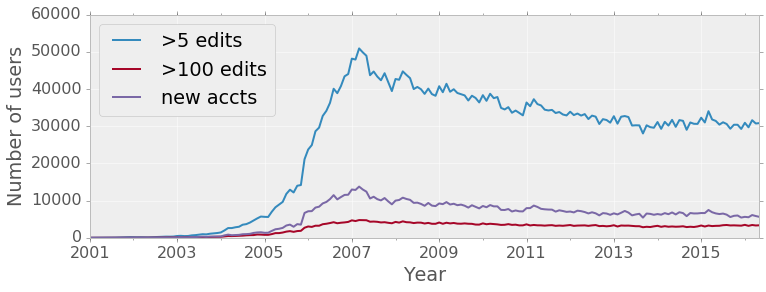

In [11]:
ax1 = counts.plot(x='date',y=['>5 edits','>100 edits','new accts'], figsize=(12,4), 
                  label="Users making >5 edits in a month")

ax1.set_xlabel("Year")
ax1.set_ylabel("Number of users")
ax1.yaxis.set_major_formatter(ScalarFormatter())

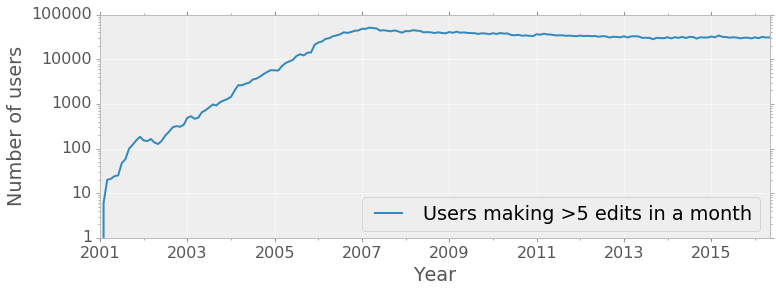

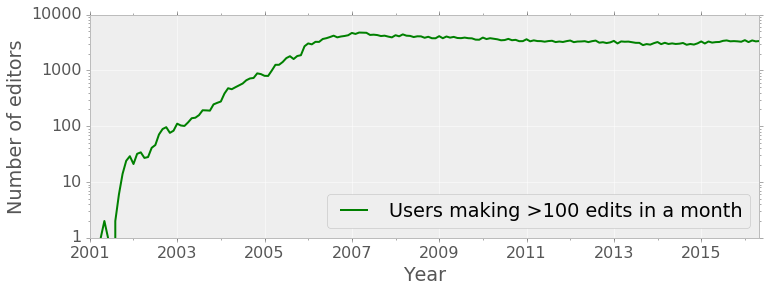

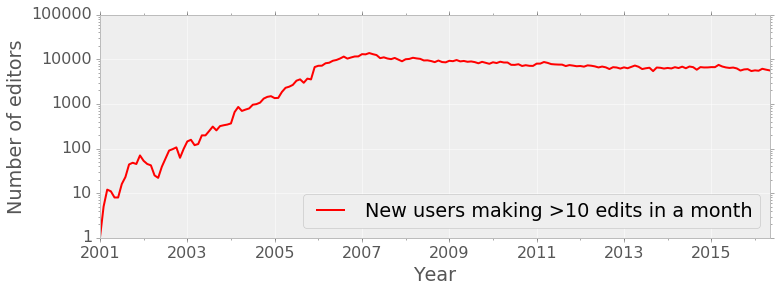

In [12]:
matplotlib.style.use(['bmh'])
font = {'weight' : 'regular',
        'size'   : 16}

matplotlib.rc('font', **font)

ax1 = counts.plot(x='date',y='>5 edits', figsize=(12,4), 
                  label="Users making >5 edits in a month",logy=True)

ax1.set_xlabel("Year")
ax1.set_ylabel("Number of users")
ax1.yaxis.set_major_formatter(ScalarFormatter())
plt.legend(bbox_to_anchor=(.9, .3),
           bbox_transform=plt.gcf().transFigure)

ax2 = counts.plot(x='date',y='>100 edits', figsize=(12,4), 
                  label="Users making >100 edits in a month",color="g", logy=True)
ax2.set_xlabel("Year")
ax2.set_ylabel("Number of editors")
ax2.yaxis.set_major_formatter(ScalarFormatter())

ax3 = counts.plot(x='date',y='new accts', figsize=(12,4), 
                  label="New users making >10 edits in a month",color="r", logy=True)
ax3.set_xlabel("Year")
ax3.set_ylabel("Number of editors")
ax3.yaxis.set_major_formatter(ScalarFormatter())


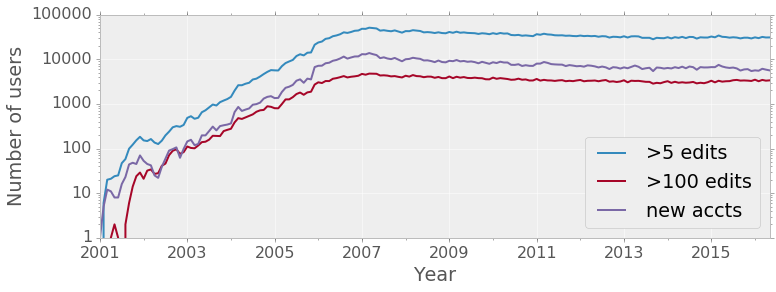

In [13]:
ax1 = counts.plot(x='date',y=['>5 edits','>100 edits','new accts'], figsize=(12,4), 
                  label="Users making >5 edits in a month",logy=True)

ax1.set_xlabel("Year")
ax1.set_ylabel("Number of users")
ax1.yaxis.set_major_formatter(ScalarFormatter())


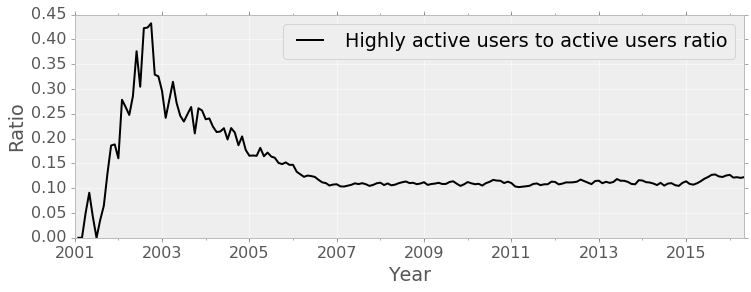

In [14]:
ax3 = counts.plot(x='date',y='highly_active_to_active_ratio', figsize=(12,4), 
                  label="Highly active users to active users ratio",color="k")
ax3.set_xlabel("Year")
ax3.set_ylabel("Ratio")

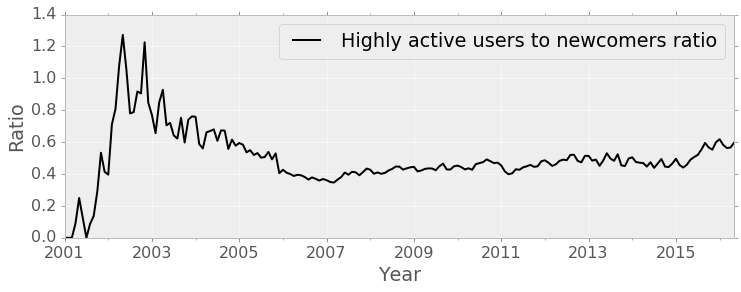

In [15]:

ax3 = counts.plot(x='date',y='highly_active_to_newcomer_ratio', figsize=(12,4), 
                  label="Highly active users to newcomers ratio",color="k")
ax3.set_xlabel("Year")
ax3.set_ylabel("Ratio")

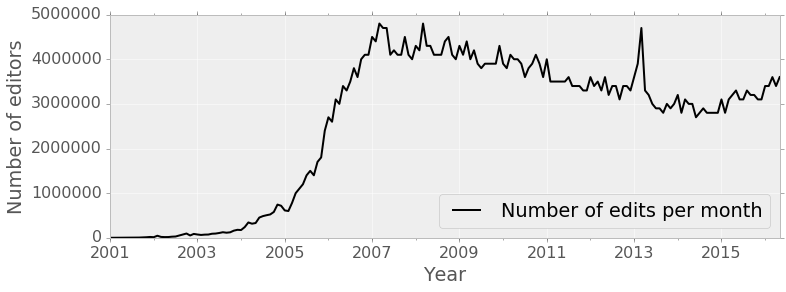

In [16]:

ax3 = counts.plot(x='date',y='edits_float', figsize=(12,4), 
                  label="Number of edits per month",color="k")
ax3.set_xlabel("Year")
ax3.set_ylabel("Number of editors")

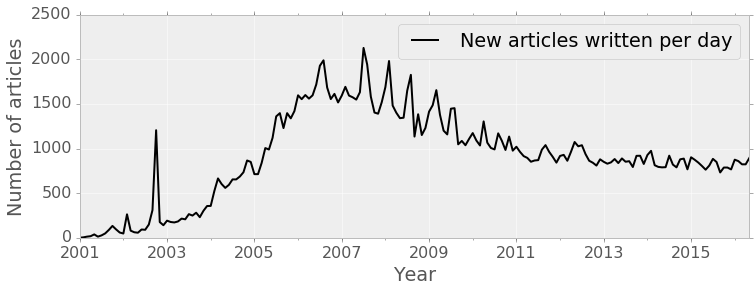

In [17]:

ax3 = counts.plot(x='date',y='new per day', figsize=(12,4), 
                  label="New articles written per day",color="k")
ax3.set_xlabel("Year")
ax3.set_ylabel("Number of articles")

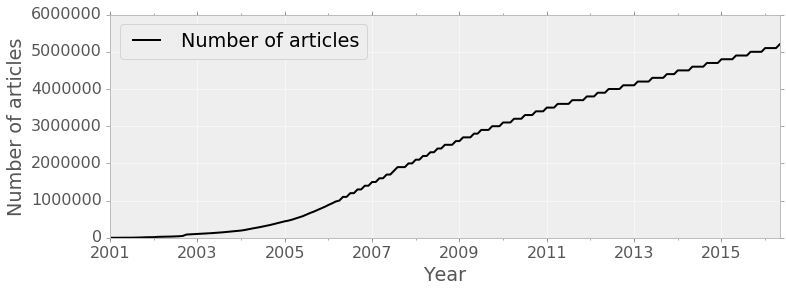

In [18]:

ax3 = counts.plot(x='date',y='article_count_float', figsize=(12,4), 
                  label="Number of articles",color="k")
ax3.set_xlabel("Year")
ax3.set_ylabel("Number of articles")

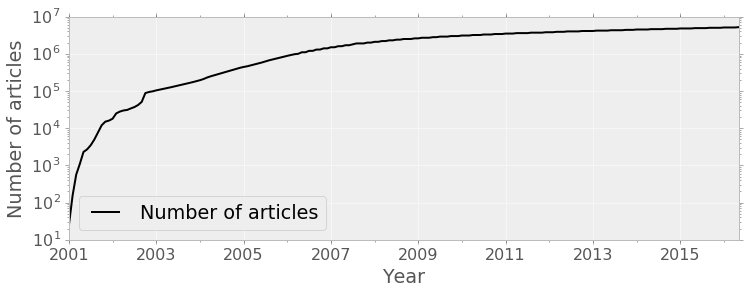

In [19]:
ax3 = counts.plot(x='date',y='article_count_float', figsize=(12,4), 
                  label="Number of articles",color="k",logy=True)
ax3.set_xlabel("Year")
ax3.set_ylabel("Number of articles")